In [1]:
# Dependencies
import os 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress 

#Reading in Files
cdc_df = pd.read_csv("Resource/VSRR_Provisional_Drug_Overdose_Death_Counts_2015_2021.csv", thousands=',')
care_df = pd.read_csv("Resource/Medicare_Opioid_Prescribing_Data_2013_2019.csv", low_memory = False)
caid_df = pd.read_csv("Resource/Medicaid_Opioid_Prescribing_data_2013_2019.csv", low_memory = False)

In [2]:
# Filtering Medcaid dropping year 2013 & 2014 and filtering for all plan types
caid_year = caid_df.loc[(caid_df["Year"] != 2013) & (caid_df["Year"] != 2014)]
caid_clean = caid_year.loc[caid_year["Plan_Type"]=="All"]
# Reset the index values for the dataframe
caid_clean = caid_clean.reset_index(drop=True)
caid_clean


,Year,Geo_Lvl,Geo_Cd,Geo_Desc,Plan_Type,Tot_Opioid_Clms,Tot_Clms,Opioid_Prscrbng_Rate,Opioid_Prscrbng_Rate_5Y_Chg,Opioid_Prscrbng_Rate_1Y_Chg,LA_Tot_Opioid_Clms,LA_Opioid_Prscrbng_Rate,LA_Opioid_Prscrbng_Rate_5Y_Chg,LA_Opioid_Prscrbng_Rate_1Y_Chg
0,2019,National,NaN,National,All,21978286.0,677248025.0,3.25,-3.22,-0.44,3108845.0,14.15,6.67,4.62
1,2019,State,1.0,Alabama,All,224310.0,7230251.0,3.10,-3.23,-1.08,10308.0,4.60,0.16,0.48
2,2019,State,2.0,Alaska,All,65394.0,1434139.0,4.56,-3.33,-1.20,8268.0,12.64,0.88,-0.71
3,2019,State,4.0,Arizona,All,595206.0,14923326.0,3.99,-5.14,-0.75,44311.0,7.44,-2.79,-0.52
4,2019,State,5.0,Arkansas,All,216081.0,4999626.0,4.32,-3.12,-0.88,8129.0,3.76,-0.34,-1.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,2015,State,51.0,Virginia,All,583116.0,10186332.0,5.72,NaN,-0.62,42311.0,7.26,NaN,-0.26
256,2015,State,53.0,Washington,All,1136474.0,14016747.0,8.11,NaN,-0.89,106143.0,9.34,NaN,0.18
257,2015,State,54.0,West Virginia,All,520370.0,9293729.0,5.60,NaN,-1.30,25575.0,4.91,NaN,0.66
258,2015,State,55.0,Wisconsin,All,962286.0,11306189.0,8.51,NaN,-0.35,146248.0,15.20,NaN,1.04


In [3]:
# Changing column name to state for merging later
caid_clean = caid_clean.rename(columns={"Geo_Desc":"State"})

caid_clean

,Year,Geo_Lvl,Geo_Cd,State,Plan_Type,Tot_Opioid_Clms,Tot_Clms,Opioid_Prscrbng_Rate,Opioid_Prscrbng_Rate_5Y_Chg,Opioid_Prscrbng_Rate_1Y_Chg,LA_Tot_Opioid_Clms,LA_Opioid_Prscrbng_Rate,LA_Opioid_Prscrbng_Rate_5Y_Chg,LA_Opioid_Prscrbng_Rate_1Y_Chg
0,2019,National,NaN,National,All,21978286.0,677248025.0,3.25,-3.22,-0.44,3108845.0,14.15,6.67,4.62
1,2019,State,1.0,Alabama,All,224310.0,7230251.0,3.10,-3.23,-1.08,10308.0,4.60,0.16,0.48
2,2019,State,2.0,Alaska,All,65394.0,1434139.0,4.56,-3.33,-1.20,8268.0,12.64,0.88,-0.71
3,2019,State,4.0,Arizona,All,595206.0,14923326.0,3.99,-5.14,-0.75,44311.0,7.44,-2.79,-0.52
4,2019,State,5.0,Arkansas,All,216081.0,4999626.0,4.32,-3.12,-0.88,8129.0,3.76,-0.34,-1.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,2015,State,51.0,Virginia,All,583116.0,10186332.0,5.72,NaN,-0.62,42311.0,7.26,NaN,-0.26
256,2015,State,53.0,Washington,All,1136474.0,14016747.0,8.11,NaN,-0.89,106143.0,9.34,NaN,0.18
257,2015,State,54.0,West Virginia,All,520370.0,9293729.0,5.60,NaN,-1.30,25575.0,4.91,NaN,0.66
258,2015,State,55.0,Wisconsin,All,962286.0,11306189.0,8.51,NaN,-0.35,146248.0,15.20,NaN,1.04


In [4]:
# Filtering Medicaid Data by Breakout Type and Perscription Geographic Levels for National or State levels
care_year = care_df.loc[(care_df["Year"] != 2013) & (care_df["Year"] != 2014)]
care_clean = care_year.loc[(care_year["Breakout_Type"]=="Totals") &  (care_year["Prscrbr_Geo_Lvl"]=="National") | (care_year["Prscrbr_Geo_Lvl"]=="State")  &  (care_year["Breakout"]=="Overall") & (care_df["Prscrbr_Geo_Desc"] != 'American Samoa')& (care_df["Prscrbr_Geo_Desc"] != 'Guam') & (care_df["Prscrbr_Geo_Desc"] != 'American Samoa') & (care_df["Prscrbr_Geo_Desc"] != 'Northern Mariana Islands') & (care_df["Prscrbr_Geo_Desc"] != 'Puerto Rico') & (care_df["Prscrbr_Geo_Desc"] != 'Virgin Islands')]

# Reset the index values for the dataframe
care_clean = care_clean.reset_index(drop=True)
care_clean

,Year,Prscrbr_Geo_Lvl,Prscrbr_Geo_Cd,Prscrbr_Geo_Desc,RUCA_Cd,Breakout_Type,Breakout,Tot_Prscrbrs,Tot_Opioid_Prscrbrs,Tot_Opioid_Clms,Tot_Clms,Opioid_Prscrbng_Rate,Opioid_Prscrbng_Rate_5Y_Chg,Opioid_Prscrbng_Rate_1Y_Chg,LA_Tot_Opioid_Clms,LA_Opioid_Prscrbng_Rate,LA_Opioid_Prscrbng_Rate_5Y_Chg,LA_Opioid_Prscrbng_Rate_1Y_Chg
0,2019,National,NaN,National,NaN,Totals,Overall,1239380.0,803549.0,66138200.0,1.501140e+09,4.41,-1.32,-0.27,7290510.0,11.02,-1.73,-0.77
1,2019,State,1.0,Alabama,NaN,Totals,Overall,15575.0,9739.0,1814583.0,2.800821e+07,6.48,-1.40,-0.42,138456.0,7.63,-2.13,-0.73
2,2019,State,2.0,Alaska,NaN,Totals,Overall,2847.0,1935.0,80311.0,1.639104e+06,4.90,-2.01,-0.90,13005.0,16.19,-3.73,-2.42
3,2019,State,4.0,Arizona,NaN,Totals,Overall,25876.0,16578.0,1359955.0,2.569376e+07,5.29,-1.79,-0.33,184250.0,13.55,-2.58,-1.25
4,2019,State,5.0,Arkansas,NaN,Totals,Overall,9700.0,7258.0,998319.0,1.789430e+07,5.58,-1.08,-0.32,76135.0,7.63,-1.69,-0.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,2015,State,51.0,Virginia,NaN,Totals,Overall,25319.0,19755.0,1720058.0,3.055526e+07,5.63,NaN,-0.29,201649.0,11.72,NaN,0.38
256,2015,State,53.0,Washington,NaN,Totals,Overall,25351.0,19532.0,1658461.0,2.374570e+07,6.98,NaN,-0.19,281071.0,16.95,NaN,-0.20
257,2015,State,54.0,West Virginia,NaN,Totals,Overall,7064.0,5174.0,752812.0,1.288542e+07,5.84,NaN,-0.56,69188.0,9.19,NaN,0.25
258,2015,State,55.0,Wisconsin,NaN,Totals,Overall,20540.0,16177.0,1489660.0,2.539947e+07,5.86,NaN,-0.15,263191.0,17.67,NaN,-0.17


In [5]:
# Changing column name to state for merging late
care_clean = care_clean.rename(columns={"Prscrbr_Geo_Desc":"State"})
care_clean

,Year,Prscrbr_Geo_Lvl,Prscrbr_Geo_Cd,State,RUCA_Cd,Breakout_Type,Breakout,Tot_Prscrbrs,Tot_Opioid_Prscrbrs,Tot_Opioid_Clms,Tot_Clms,Opioid_Prscrbng_Rate,Opioid_Prscrbng_Rate_5Y_Chg,Opioid_Prscrbng_Rate_1Y_Chg,LA_Tot_Opioid_Clms,LA_Opioid_Prscrbng_Rate,LA_Opioid_Prscrbng_Rate_5Y_Chg,LA_Opioid_Prscrbng_Rate_1Y_Chg
0,2019,National,NaN,National,NaN,Totals,Overall,1239380.0,803549.0,66138200.0,1.501140e+09,4.41,-1.32,-0.27,7290510.0,11.02,-1.73,-0.77
1,2019,State,1.0,Alabama,NaN,Totals,Overall,15575.0,9739.0,1814583.0,2.800821e+07,6.48,-1.40,-0.42,138456.0,7.63,-2.13,-0.73
2,2019,State,2.0,Alaska,NaN,Totals,Overall,2847.0,1935.0,80311.0,1.639104e+06,4.90,-2.01,-0.90,13005.0,16.19,-3.73,-2.42
3,2019,State,4.0,Arizona,NaN,Totals,Overall,25876.0,16578.0,1359955.0,2.569376e+07,5.29,-1.79,-0.33,184250.0,13.55,-2.58,-1.25
4,2019,State,5.0,Arkansas,NaN,Totals,Overall,9700.0,7258.0,998319.0,1.789430e+07,5.58,-1.08,-0.32,76135.0,7.63,-1.69,-0.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,2015,State,51.0,Virginia,NaN,Totals,Overall,25319.0,19755.0,1720058.0,3.055526e+07,5.63,NaN,-0.29,201649.0,11.72,NaN,0.38
256,2015,State,53.0,Washington,NaN,Totals,Overall,25351.0,19532.0,1658461.0,2.374570e+07,6.98,NaN,-0.19,281071.0,16.95,NaN,-0.20
257,2015,State,54.0,West Virginia,NaN,Totals,Overall,7064.0,5174.0,752812.0,1.288542e+07,5.84,NaN,-0.56,69188.0,9.19,NaN,0.25
258,2015,State,55.0,Wisconsin,NaN,Totals,Overall,20540.0,16177.0,1489660.0,2.539947e+07,5.86,NaN,-0.15,263191.0,17.67,NaN,-0.17


In [681]:
# Dropping years 2020 & 2021 and filtering indicator column 
cdc_year = cdc_df.loc[(cdc_df["Year"] != 2020) & (cdc_df["Year"] != 2021) & (cdc_df["State"] != 'YC')]
cdc_numofdeathsindicator = cdc_year.loc[(cdc_year["Indicator"]=="Number of Deaths")]

# Reset the index values for the dataframes
cdc_numofdeathsindicator = cdc_numofdeathsindicator.reset_index(drop=True)
cdc_numofdeathsindicator

,State,Year,Month,Period,Indicator,Data Value,Percent Complete,Percent Pending Investigation,State Name,Footnote,Footnote Symbol,Predicted Value
0,AK,2015,April,12 month-ending,Number of Deaths,4133.0,100,0.000000,Alaska,Numbers may differ from published reports usin...,**,NaN
1,AK,2015,August,12 month-ending,Number of Deaths,4222.0,100,0.000000,Alaska,Numbers may differ from published reports usin...,**,NaN
2,AK,2015,December,12 month-ending,Number of Deaths,4193.0,100,0.000000,Alaska,Numbers may differ from published reports usin...,**,NaN
3,AK,2015,February,12 month-ending,Number of Deaths,4084.0,100,0.000000,Alaska,Numbers may differ from published reports usin...,**,NaN
4,AK,2015,January,12 month-ending,Number of Deaths,4034.0,100,0.000000,Alaska,Numbers may differ from published reports usin...,**,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3115,WY,2019,March,12 month-ending,Number of Deaths,4657.0,100,0.042946,Wyoming,Numbers may differ from published reports usin...,**,NaN
3116,WY,2019,May,12 month-ending,Number of Deaths,4686.0,100,0.042680,Wyoming,Numbers may differ from published reports usin...,**,NaN
3117,WY,2019,November,12 month-ending,Number of Deaths,4708.0,100,0.042481,Wyoming,Numbers may differ from published reports usin...,**,NaN
3118,WY,2019,October,12 month-ending,Number of Deaths,4717.0,100,0.042400,Wyoming,Numbers may differ from published reports usin...,**,NaN


In [682]:
# Changing column names for merging later
cdc_numofdeathsindicator = cdc_numofdeathsindicator.rename(columns={"State" : "State ID", "State Name" : "State"})
cdc_numofdeathsindicator['Data Value'] = pd.to_numeric(cdc_numofdeathsindicator['Data Value'], errors = 'coerce')
cdcnumofdeathsaggregated=cdc_numofdeathsindicator.groupby(['State ID', 'Year']).agg({'Data Value' : ['sum']})

cdcnumofdeathsaggregated

Data Value
                     sum
State ID Year           
AK       2015    50086.0
         2016    51141.0
         2017    51597.0
         2018    51865.0
         2019    53484.0
...                  ...
WY       2015    53812.0
         2016    52723.0
         2017    52181.0
         2018    54073.0
         2019    56144.0

[260 rows x 1 columns]

In [690]:
# Dropping years 2020 & 2021 and filtering indicator column 
cdc_year = cdc_df.loc[(cdc_df["Year"] != 2020) & (cdc_df["Year"] != 2021) & (cdc_df["State"] != 'YC')]
cdc_numofdrugdeathsindicator = cdc_year.loc[(cdc_year["Indicator"]=="Number of Drug Overdose Deaths")]

# Reset the index values for the dataframes
cdc_numofdrugdeathsindicator = cdc_numofdrugdeathsindicator.reset_index(drop=True)
cdc_numofdrugdeathsindicator

,State,Year,Month,Period,Indicator,Data Value,Percent Complete,Percent Pending Investigation,State Name,Footnote,Footnote Symbol,Predicted Value
0,AK,2015,April,12 month-ending,Number of Drug Overdose Deaths,126.0,100,0.000000,Alaska,Numbers may differ from published reports usin...,**,126.0
1,AK,2015,August,12 month-ending,Number of Drug Overdose Deaths,124.0,100,0.000000,Alaska,Numbers may differ from published reports usin...,**,124.0
2,AK,2015,December,12 month-ending,Number of Drug Overdose Deaths,121.0,100,0.000000,Alaska,Numbers may differ from published reports usin...,**,121.0
3,AK,2015,February,12 month-ending,Number of Drug Overdose Deaths,127.0,100,0.000000,Alaska,Numbers may differ from published reports usin...,**,127.0
4,AK,2015,January,12 month-ending,Number of Drug Overdose Deaths,126.0,100,0.000000,Alaska,Numbers may differ from published reports usin...,**,126.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3115,WY,2019,March,12 month-ending,Number of Drug Overdose Deaths,64.0,100,0.042946,Wyoming,Numbers may differ from published reports usin...,**,65.0
3116,WY,2019,May,12 month-ending,Number of Drug Overdose Deaths,63.0,100,0.042680,Wyoming,Numbers may differ from published reports usin...,**,64.0
3117,WY,2019,November,12 month-ending,Number of Drug Overdose Deaths,64.0,100,0.042481,Wyoming,Numbers may differ from published reports usin...,**,65.0
3118,WY,2019,October,12 month-ending,Number of Drug Overdose Deaths,67.0,100,0.042400,Wyoming,Numbers may differ from published reports usin...,**,68.0


In [691]:
# Changing column names for merging later
cdc_numofdrugdeathsindicator = cdc_numofdrugdeathsindicator.rename(columns={"State" : "State ID", "State Name" : "State"})
cdc_numofdrugdeathsindicator['Data Value'] = pd.to_numeric(cdc_numofdrugdeathsindicator['Data Value'], errors = 'coerce')
cdc_numofdrugdeathsaggregated=cdc_numofdrugdeathsindicator.groupby(['State ID', 'Year']).agg({'Data Value' : ['sum']})
cdc_numofdrugdeathsindicator

,State ID,Year,Month,Period,Indicator,Data Value,Percent Complete,Percent Pending Investigation,State,Footnote,Footnote Symbol,Predicted Value
0,AK,2015,April,12 month-ending,Number of Drug Overdose Deaths,126.0,100,0.000000,Alaska,Numbers may differ from published reports usin...,**,126.0
1,AK,2015,August,12 month-ending,Number of Drug Overdose Deaths,124.0,100,0.000000,Alaska,Numbers may differ from published reports usin...,**,124.0
2,AK,2015,December,12 month-ending,Number of Drug Overdose Deaths,121.0,100,0.000000,Alaska,Numbers may differ from published reports usin...,**,121.0
3,AK,2015,February,12 month-ending,Number of Drug Overdose Deaths,127.0,100,0.000000,Alaska,Numbers may differ from published reports usin...,**,127.0
4,AK,2015,January,12 month-ending,Number of Drug Overdose Deaths,126.0,100,0.000000,Alaska,Numbers may differ from published reports usin...,**,126.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3115,WY,2019,March,12 month-ending,Number of Drug Overdose Deaths,64.0,100,0.042946,Wyoming,Numbers may differ from published reports usin...,**,65.0
3116,WY,2019,May,12 month-ending,Number of Drug Overdose Deaths,63.0,100,0.042680,Wyoming,Numbers may differ from published reports usin...,**,64.0
3117,WY,2019,November,12 month-ending,Number of Drug Overdose Deaths,64.0,100,0.042481,Wyoming,Numbers may differ from published reports usin...,**,65.0
3118,WY,2019,October,12 month-ending,Number of Drug Overdose Deaths,67.0,100,0.042400,Wyoming,Numbers may differ from published reports usin...,**,68.0


In [8]:
# Dropping years 2020 & 2021 and filtering indicator column 
cdc_year = cdc_df.loc[(cdc_df["Year"] != 2020) & (cdc_df["Year"] != 2021) & (cdc_df["State"] != 'YC')]
cdc_numofopioiddeathsindicator = cdc_year.loc[(cdc_year["Indicator"]=="Opioids (T40.0-T40.4,T40.6)")]

# Reset the index values for the dataframes
cdc_numofopioiddeathsindicator = cdc_numofopioiddeathsindicator.reset_index(drop=True)
cdc_numofopioiddeathsindicator
                                                                             
                                                                             
# Changing column names for merging later
cdc_numofopioiddeathsindicator = cdc_numofopioiddeathsindicator.rename(columns={"State" : "State ID", "State Name" : "State"})
cdc_numofopioiddeathsindicator['Data Value'] = pd.to_numeric(cdc_numofopioiddeathsindicator['Data Value'], errors = 'coerce')
cdc_numofopioiddeathsaggregated=cdc_numofopioiddeathsindicator.groupby(['State ID', 'Year']).agg({'Data Value' : ['sum']})

cdc_numofopioiddeathsaggregated                                                                           
                                                                             

Data Value
                     sum
State ID Year           
AK       2015      165.0
         2016     1163.0
         2017     1110.0
         2018      990.0
         2019      962.0
...                  ...
WY       2015        0.0
         2016        0.0
         2017      404.0
         2018      497.0
         2019      508.0

[225 rows x 1 columns]

# merge and clean up medicare/medicade datasets

In [187]:
# Merging Medicaid & Medicare data with an Outer Join
carecaid = pd.merge(care_clean, caid_clean, how = "outer", on = ["Year", "State"])
carecaid

,Year,Prscrbr_Geo_Lvl,Prscrbr_Geo_Cd,State,RUCA_Cd,Breakout_Type,Breakout,Tot_Prscrbrs,Tot_Opioid_Prscrbrs,Tot_Opioid_Clms_x,...,Plan_Type,Tot_Opioid_Clms_y,Tot_Clms_y,Opioid_Prscrbng_Rate_y,Opioid_Prscrbng_Rate_5Y_Chg_y,Opioid_Prscrbng_Rate_1Y_Chg_y,LA_Tot_Opioid_Clms_y,LA_Opioid_Prscrbng_Rate_y,LA_Opioid_Prscrbng_Rate_5Y_Chg_y,LA_Opioid_Prscrbng_Rate_1Y_Chg_y
0,2019,National,NaN,National,NaN,Totals,Overall,1239380.0,803549.0,66138200.0,...,All,21978286.0,677248025.0,3.25,-3.22,-0.44,3108845.0,14.15,6.67,4.62
1,2019,State,1.0,Alabama,NaN,Totals,Overall,15575.0,9739.0,1814583.0,...,All,224310.0,7230251.0,3.10,-3.23,-1.08,10308.0,4.60,0.16,0.48
2,2019,State,2.0,Alaska,NaN,Totals,Overall,2847.0,1935.0,80311.0,...,All,65394.0,1434139.0,4.56,-3.33,-1.20,8268.0,12.64,0.88,-0.71
3,2019,State,4.0,Arizona,NaN,Totals,Overall,25876.0,16578.0,1359955.0,...,All,595206.0,14923326.0,3.99,-5.14,-0.75,44311.0,7.44,-2.79,-0.52
4,2019,State,5.0,Arkansas,NaN,Totals,Overall,9700.0,7258.0,998319.0,...,All,216081.0,4999626.0,4.32,-3.12,-0.88,8129.0,3.76,-0.34,-1.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,2015,State,51.0,Virginia,NaN,Totals,Overall,25319.0,19755.0,1720058.0,...,All,583116.0,10186332.0,5.72,NaN,-0.62,42311.0,7.26,NaN,-0.26
256,2015,State,53.0,Washington,NaN,Totals,Overall,25351.0,19532.0,1658461.0,...,All,1136474.0,14016747.0,8.11,NaN,-0.89,106143.0,9.34,NaN,0.18
257,2015,State,54.0,West Virginia,NaN,Totals,Overall,7064.0,5174.0,752812.0,...,All,520370.0,9293729.0,5.60,NaN,-1.30,25575.0,4.91,NaN,0.66
258,2015,State,55.0,Wisconsin,NaN,Totals,Overall,20540.0,16177.0,1489660.0,...,All,962286.0,11306189.0,8.51,NaN,-0.35,146248.0,15.20,NaN,1.04


In [271]:
# create list with "National" in it, then use it to drop all "National" states
drop = ["National"]
carecaid_clean = carecaid.loc[carecaid["State"].isin(drop)==False]

#drop all unwanted columns
carecaid_clean = carecaid_clean.drop(columns=["Prscrbr_Geo_Lvl", "Prscrbr_Geo_Cd","Prscrbr_Geo_Cd","RUCA_Cd","Breakout_Type","Breakout","Plan_Type",
                                              "Geo_Cd", "LA_Tot_Opioid_Clms_x", "LA_Opioid_Prscrbng_Rate_x", "LA_Opioid_Prscrbng_Rate_5Y_Chg_x",
                                              "LA_Opioid_Prscrbng_Rate_1Y_Chg_x","Geo_Lvl","LA_Tot_Opioid_Clms_y","LA_Opioid_Prscrbng_Rate_y",
                                              "LA_Opioid_Prscrbng_Rate_5Y_Chg_y", "LA_Opioid_Prscrbng_Rate_1Y_Chg_y"], axis=1)

#rename columns for clarity - adding "Medicare" and "Medicaid" to appropriate columns
carecaid_clean = carecaid_clean.rename(columns={"Tot_Prscrbrs": "Total Prescribers",
                                                "Tot_Opioid_Prscrbrs": "Total Opioid Prescribers",
                                                "Tot_Opioid_Clms_x":"Total Opioid Claims: Medicare",
                                                "Tot_Clms_x": "Total Claims: Medicare",
                                                "Opioid_Prscrbng_Rate_x": "Opioid Prescribing Rate: Medicare",
                                                "Opioid_Prscrbng_Rate_5Y_Chg_x": "Opioid Prescribing Rate, 5 Year Change: Medicare",
                                                "Opioid_Prscrbng_Rate_1Y_Chg_x": "Opioid Prescribing Rate, 1 Year Change: Medicare",
                                                "Tot_Opioid_Clms_y":"Total Opioid Claims: Medicaid",
                                                "Tot_Clms_y": "Total Claims: Medicaid",
                                                "Opioid_Prscrbng_Rate_y": "Opioid Prescribing Rate: Medicaid",
                                                "Opioid_Prscrbng_Rate_5Y_Chg_y": "Opioid Prescribing Rate, 5 Year Change: Medicaid",
                                                "Opioid_Prscrbng_Rate_1Y_Chg_y": "Opioid Prescribing Rate, 1 Year Change: Medicaid"})
#show cleaned df
carecaid_clean

,Year,State,Total Prescribers,Total Opioid Prescribers,Total Opioid Claims: Medicare,Total Claims: Medicare,Opioid Prescribing Rate: Medicare,"Opioid Prescribing Rate, 5 Year Change: Medicare","Opioid Prescribing Rate, 1 Year Change: Medicare",Total Opioid Claims: Medicaid,Total Claims: Medicaid,Opioid Prescribing Rate: Medicaid,"Opioid Prescribing Rate, 5 Year Change: Medicaid","Opioid Prescribing Rate, 1 Year Change: Medicaid"
1,2019,Alabama,15575.0,9739.0,1814583.0,28008206.0,6.48,-1.40,-0.42,224310.0,7230251.0,3.10,-3.23,-1.08
2,2019,Alaska,2847.0,1935.0,80311.0,1639104.0,4.90,-2.01,-0.90,65394.0,1434139.0,4.56,-3.33,-1.20
3,2019,Arizona,25876.0,16578.0,1359955.0,25693764.0,5.29,-1.79,-0.33,595206.0,14923326.0,3.99,-5.14,-0.75
4,2019,Arkansas,9700.0,7258.0,998319.0,17894303.0,5.58,-1.08,-0.32,216081.0,4999626.0,4.32,-3.12,-0.88
5,2019,California,129325.0,80941.0,5888034.0,138971644.0,4.24,-1.29,-0.35,2760295.0,86344996.0,3.20,-3.12,-0.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,2015,Virginia,25319.0,19755.0,1720058.0,30555257.0,5.63,NaN,-0.29,583116.0,10186332.0,5.72,NaN,-0.62
256,2015,Washington,25351.0,19532.0,1658461.0,23745695.0,6.98,NaN,-0.19,1136474.0,14016747.0,8.11,NaN,-0.89
257,2015,West Virginia,7064.0,5174.0,752812.0,12885425.0,5.84,NaN,-0.56,520370.0,9293729.0,5.60,NaN,-1.30
258,2015,Wisconsin,20540.0,16177.0,1489660.0,25399474.0,5.86,NaN,-0.15,962286.0,11306189.0,8.51,NaN,-0.35


# (MCARE/MAID) Highest/Lowest/National Drug Prescription Rate graph

## Highest Prescription Rates

In [241]:
#create list of years
years = [2015, 2016, 2017, 2018, 2019]

#create list for medicare and medicaid prescription rate max and min
care_prvmax = []
caid_prvmax = []
care_prvmin = []
caid_prvmin = []

#shorten opioid prescribing rate column call 
carerate = carecaid_clean["Opioid Prescribing Rate: Medicare"]
caidrate = carecaid_clean["Opioid Prescribing Rate: Medicaid"]

In [341]:
#create df for each year
for year in years:
    yeardf = carecaid_clean.loc[carecaid_clean["Year"]==year]
    
    #add the HIGHEST opioid prescribing rate to list
    care_prvmax.append(yeardf["Opioid Prescribing Rate: Medicare"].max())
    caid_prvmax.append(yeardf["Opioid Prescribing Rate: Medicaid"].max())
    
    #add the LOWEST opioid prescribing rate to list
    care_prvmin.append(yeardf["Opioid Prescribing Rate: Medicare"].min())
    caid_prvmin.append(yeardf["Opioid Prescribing Rate: Medicaid"].min())

#loop through lists and find the full row for each, per year
#for medicare prescribing rate MAX
for rate in care_prvmax:
    care_top15 = carecaid_clean.loc[carerate == care_prvmax[0]]
    care_top16 = carecaid_clean.loc[carerate == care_prvmax[1]]
    care_top17 = carecaid_clean.loc[carerate == care_prvmax[2]]
    care_top18 = carecaid_clean.loc[carerate == care_prvmax[3]]
    care_top19 = carecaid_clean.loc[carerate == care_prvmax[4]]

#for medicaid prescribing rate MAX
for rate in caid_prvmax:
    caid_top15 = carecaid_clean.loc[caidrate == caid_prvmax[0]]
    caid_top16 = carecaid_clean.loc[caidrate == caid_prvmax[1]]
    caid_top17 = carecaid_clean.loc[caidrate == caid_prvmax[2]]
    caid_top18 = carecaid_clean.loc[caidrate == caid_prvmax[3]]
    caid_top19 = carecaid_clean.loc[caidrate == caid_prvmax[4]]

#create individual dfs for the top prescription rates & reset index
care_toppr = pd.concat([care_top15, care_top16, care_top17, care_top18, care_top19]).reset_index().drop(columns=["index"])
caid_toppr = pd.concat([caid_top15, caid_top16, caid_top17, caid_top18, caid_top19]).reset_index().drop(columns=["index"])

#set new index to year and state values
care_toppr["Year: State"] = care_toppr["Year"].map(str) + ": " + care_toppr["State"]
caid_toppr["Year: State"] = caid_toppr["Year"].map(str) + ": " + caid_toppr["State"]

#create condensed individual dfs for medicare and medicaid
care_toppr2 = care_toppr[["Year: State", "Opioid Prescribing Rate: Medicare"]]
caid_toppr2 = caid_toppr[["Year: State", "Opioid Prescribing Rate: Medicaid"]]

#show medicare df
caid_toppr2

,Year: State,Opioid Prescribing Rate: Medicaid
0,2015: Colorado,10.21
1,2016: Colorado,9.09
2,2017: Colorado,8.14
3,2018: Montana,9.48
4,2019: Virginia,10.36


## lowest prescription rate 

In [342]:
#loop through lists and find the full row for each, per year

#for medicare prescribing rate MIN
for rate in care_prvmin:
    care_bot15 = carecaid_clean.loc[carerate == care_prvmin[0]]
    care_bot16 = carecaid_clean.loc[carerate == care_prvmin[1]]
    care_bot17 = carecaid_clean.loc[carerate == care_prvmin[2]]
    care_bot18 = carecaid_clean.loc[carerate == care_prvmin[3]]
    care_bot19 = carecaid_clean.loc[carerate == care_prvmin[4]]
    
#for medicaid prescribing rate MIN
for rate in caid_prvmin:
    caid_bot15 = carecaid_clean.loc[caidrate == caid_prvmin[0]]
    caid_bot16 = carecaid_clean.loc[caidrate == caid_prvmin[1]]
    caid_bot17 = carecaid_clean.loc[caidrate == caid_prvmin[2]]
    caid_bot18 = carecaid_clean.loc[caidrate == caid_prvmin[3]]
    caid_bot19 = carecaid_clean.loc[caidrate == caid_prvmin[4]]    
      
#create individual dfs for the top prescription rates & reset index
care_botpr = pd.concat([care_bot15, care_bot16, care_bot17, care_bot18, care_bot19]).reset_index().drop(columns=["index"])
caid_botpr = pd.concat([caid_bot15, caid_bot16, caid_bot17, caid_bot18, caid_bot19]).reset_index().drop(columns=["index"])

#set new index to year and state values
care_botpr["Year: State"] = care_botpr["Year"].map(str) + ": " + care_botpr["State"]
caid_botpr["Year: State"] = caid_botpr["Year"].map(str) + ": " + caid_botpr["State"]

#create condensed individual dfs for medicare and medicaid
care_botpr2 = care_botpr[["Year: State", "Opioid Prescribing Rate: Medicare"]]
caid_botpr2 = caid_botpr[["Year: State", "Opioid Prescribing Rate: Medicaid"]]

#show medicare df
caid_botpr2

,Year: State,Opioid Prescribing Rate: Medicaid
0,2015: New York,3.23
1,2016: New York,2.86
2,2017: New York,2.48
3,2018: New York,2.00
4,2019: New York,1.74


In [452]:
#FOR REFERENCE, the highest & lowest medicare and medicaid dfs:
#medicare:
care_toppr2
care_botpr2

#medicaid:
caid_botpr2
caid_toppr2

,Year: State,Opioid Prescribing Rate: Medicaid
0,2015: Colorado,10.21
1,2016: Colorado,9.09
2,2017: Colorado,8.14
3,2018: Montana,9.48
4,2019: Virginia,10.36


# create bar graphs 

## MEDICARE bar graphs
### highest opioid prescription rate per year

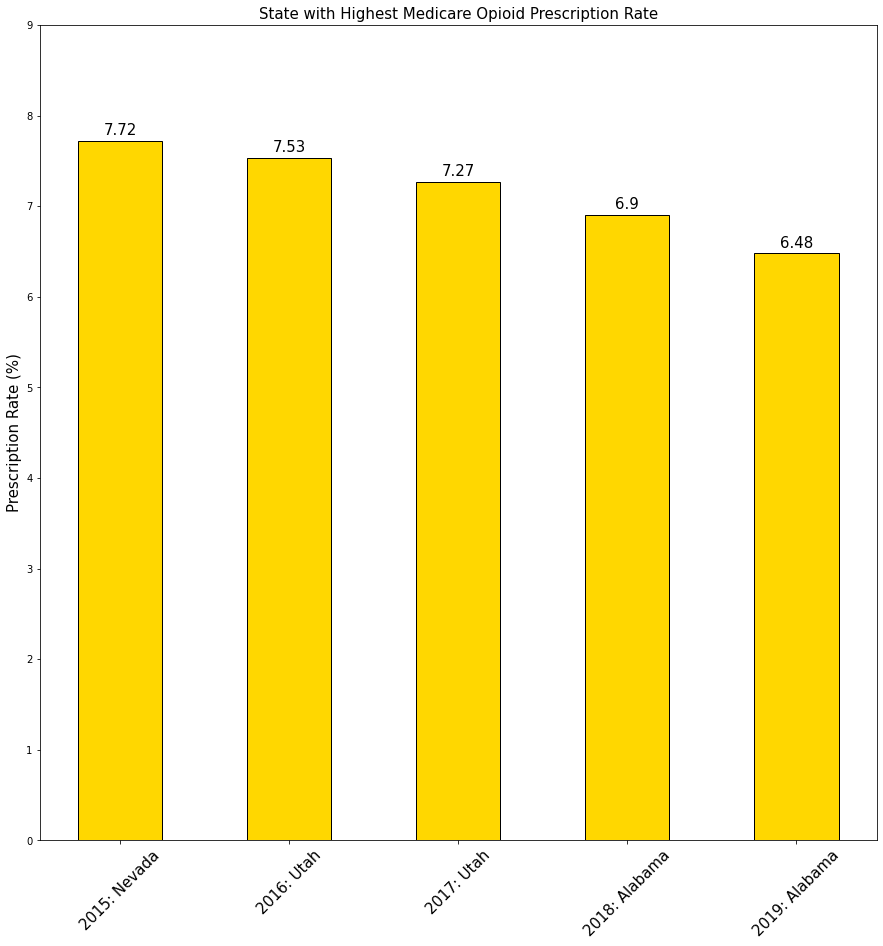

In [582]:
# set axis values
yrst = care_toppr2["Year: State"]
pr = care_toppr2["Opioid Prescribing Rate: Medicare"]

#set x-tick location
x = np.arange(len(yrst))
width = 0.5

fig, ax = plt.subplots(figsize = (15,15))

ax.set_ylabel("Prescription Rate (%)", size=15)
ax.set_title("State with Highest Medicare Opioid Prescription Rate", size=15)
ax.set_xticks(x)
ax.set_xticklabels(yrst, size=15)
plt.xticks(rotation='45')
plt.ylim(0, 9)

#create the bar plot for medicare HOPR
hopr_care = ax.bar(x, pr, width, label="pr", facecolor="gold", edgecolor="black")

#add data labels at end of bars
for p in hopr_care:
    height = p.get_height()
    ax.annotate('{}'.format(height),
        xy=(p.get_x() + p.get_width() / 2, height),
        xytext=(0, 3),
        textcoords="offset points",
        ha='center', va='bottom',
        size=15)

#save graph as png
plt.savefig("Graphs/Highest_PR_Medicare.png")
plt.show()

### lowest opioid prescription rate per year

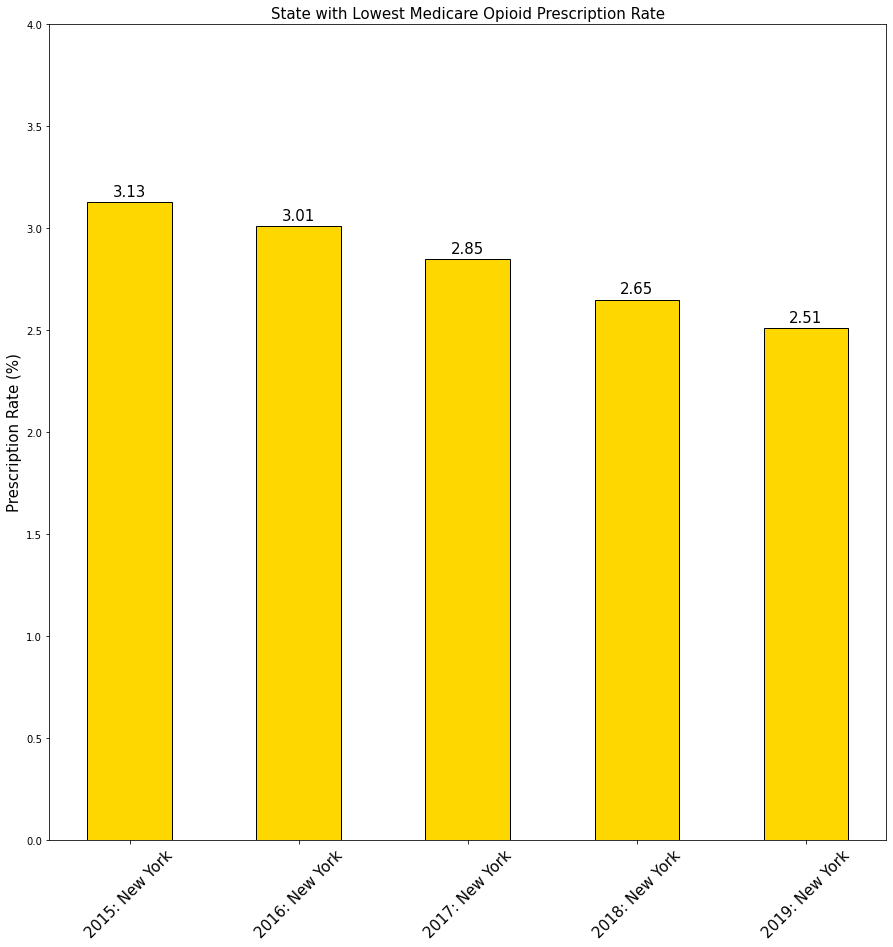

In [584]:
# set axis values
yrst = care_botpr2["Year: State"]
pr = care_botpr2["Opioid Prescribing Rate: Medicare"]

#set x-tick location
x = np.arange(len(yrst))
width = .5

fig, ax = plt.subplots(figsize = (15,15))

ax.set_ylabel("Prescription Rate (%)", size=15)
ax.set_title("State with Lowest Medicare Opioid Prescription Rate", size=15)
ax.set_xticks(x)
ax.set_xticklabels(yrst, size=15)
plt.xticks(rotation='45')
plt.ylim(0, 4)

# create the bar plot for medicare LOPR
lopr_care = ax.bar(x, pr, width, label="pr", facecolor="gold", edgecolor="black")

#add data labels at end of bars
for p in lopr_care:
    height = p.get_height()
    ax.annotate('{}'.format(height),
        xy=(p.get_x() + p.get_width() / 2, height),
        xytext=(0, 3),
        textcoords="offset points",
        ha='center', va='bottom',
        size=15)

# save graph as png
plt.savefig("Graphs/Lowest_PR_Medicare.png")
plt.show()

## MEDICAID bar graphs 
### highest opioid prescription rate per year

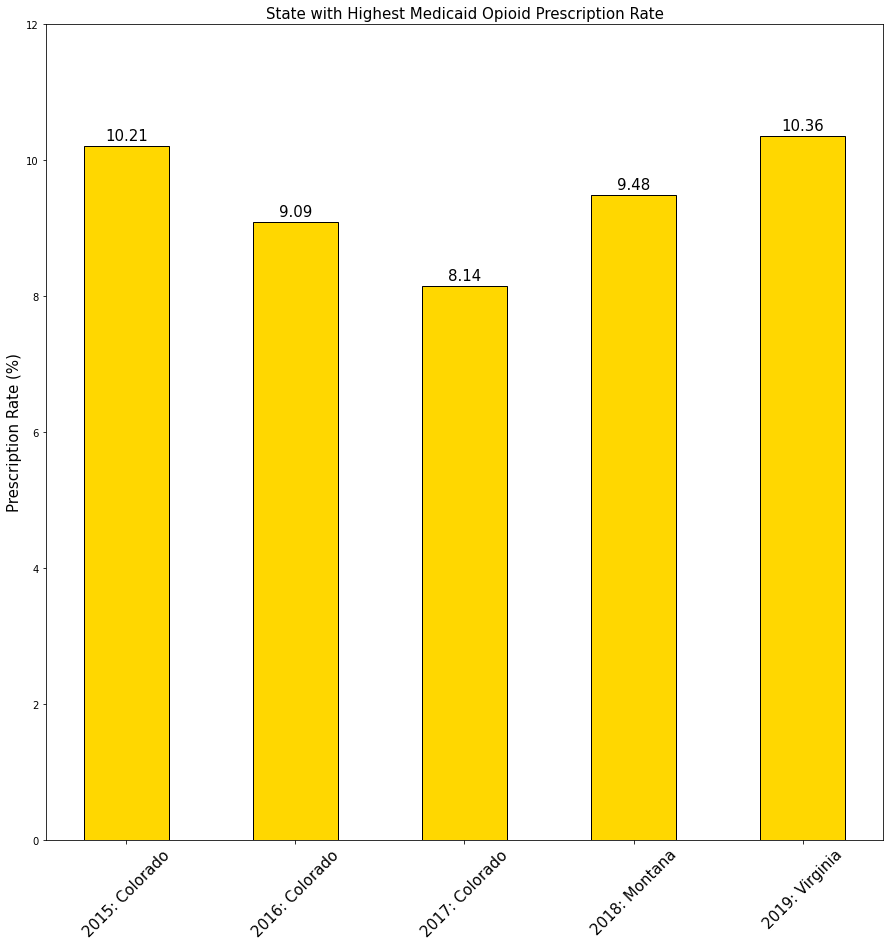

In [588]:
# set axis values
yrst = caid_toppr2["Year: State"]
pr = caid_toppr2["Opioid Prescribing Rate: Medicaid"]

#set x-tick location
x = np.arange(len(yrst))
width = .5

fig, ax = plt.subplots(figsize = (15,15))

ax.set_ylabel("Prescription Rate (%)", size=15)
ax.set_title("State with Highest Medicaid Opioid Prescription Rate", size=15)
ax.set_xticks(x)
ax.set_xticklabels(yrst, size=15)
plt.xticks(rotation='45')
plt.ylim(0, 12)

# create the bar plot for medicaid HOPR
hopr_caid = ax.bar(x, pr, width, label="pr", facecolor="gold", edgecolor="black")

#add data labels at end of bars
for p in hopr_caid:
    height = p.get_height()
    ax.annotate('{}'.format(height),
        xy=(p.get_x() + p.get_width() / 2, height),
        xytext=(0, 3),
        textcoords="offset points",
        ha='center', va='bottom',
        size=15)

#save graph as png
plt.savefig("Graphs/Highest_PR_Medicaid.png")
plt.show()

### lowest medicaid opioid prescription rate per year

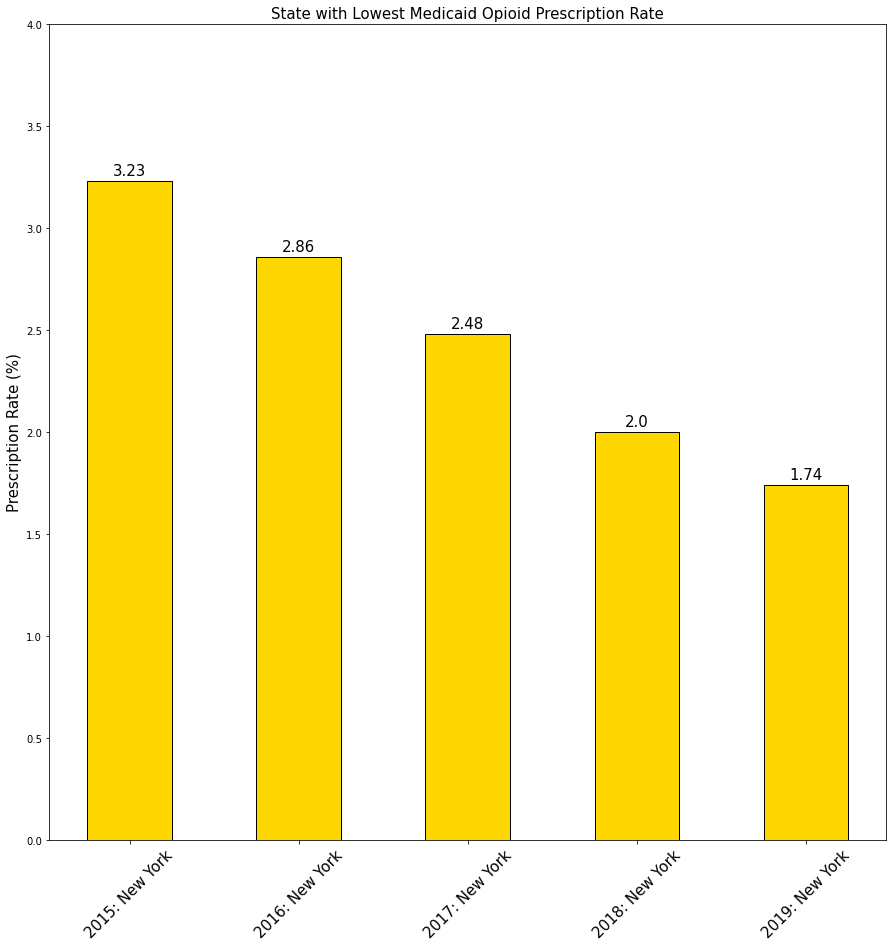

In [589]:
# set axis values
yrst = caid_botpr2["Year: State"]
pr = caid_botpr2["Opioid Prescribing Rate: Medicaid"]

#set x-tick location
x = np.arange(len(yrst))
width = .5

fig, ax = plt.subplots(figsize = (15,15))

ax.set_ylabel("Prescription Rate (%)", size=15)
ax.set_title("State with Lowest Medicaid Opioid Prescription Rate", size=15)
ax.set_xticks(x)
ax.set_xticklabels(yrst, size=15)
plt.xticks(rotation='45')
plt.ylim(0, 4)

# create the bar plot for medicaid LOPR
lopr_caid = ax.bar(x, pr, width, label="pr", facecolor="gold", edgecolor="black")

#add data labels at end of bars
for p in lopr_caid:
    height = p.get_height()
    ax.annotate('{}'.format(height),
        xy=(p.get_x() + p.get_width() / 2, height),
        xytext=(0, 3),
        textcoords="offset points",
        ha='center', va='bottom',
        size=15)

#save graph as png
plt.savefig("Graphs/Lowest_PR_Medicaid.png")
plt.show()

## combined bar graphs 

### highest prescription rates 

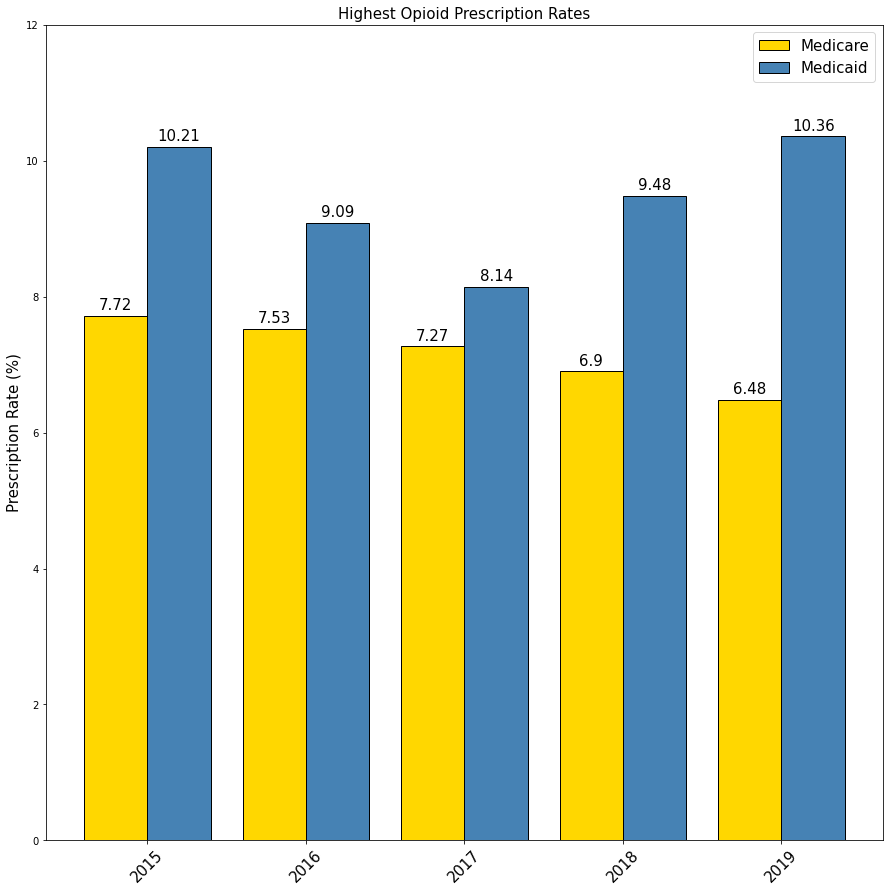

In [596]:
# set axis values
years = [2015, 2016, 2017, 2018, 2019]
y_care = care_toppr2["Opioid Prescribing Rate: Medicare"]
y_caid = caid_toppr2["Opioid Prescribing Rate: Medicaid"]

#set x-tick location
x = np.arange(len(years))
width = 0.4

fig, ax = plt.subplots(figsize = (15,15))

ax.set_ylabel("Prescription Rate (%)", size=15)
ax.set_title("Highest Opioid Prescription Rates", size=15)
ax.set_xticks(x)
ax.set_xticklabels(years, size=15)
plt.xticks(rotation='45')
plt.ylim(0, 12)

# create the bar plot for medicaid LOPR
hopr_care = ax.bar(x-0.2, y_care, width, label="pr", facecolor="gold", edgecolor="black")
hopr_caid = ax.bar(x+0.2, y_caid, width, label="pr", facecolor="steelblue", edgecolor="black")

#add data labels at end of bars
for p in hopr_care:
    height = p.get_height()
    ax.annotate('{}'.format(height),
        xy=(p.get_x() + p.get_width() / 2, height),
        xytext=(0, 3),
        textcoords="offset points",
        ha='center', va='bottom',
        size=15)

for p in hopr_caid:
    height = p.get_height()
    ax.annotate('{}'.format(height),
        xy=(p.get_x() + p.get_width() / 2, height),
        xytext=(0, 3),
        textcoords="offset points",
        ha='center', va='bottom',
        size=15)

plt.legend(["Medicare", "Medicaid"], prop={'size': 15})

#save graph as png
plt.savefig("Graphs/Highest_PR_Both.png")

plt.show()

### lowest prescription rates 

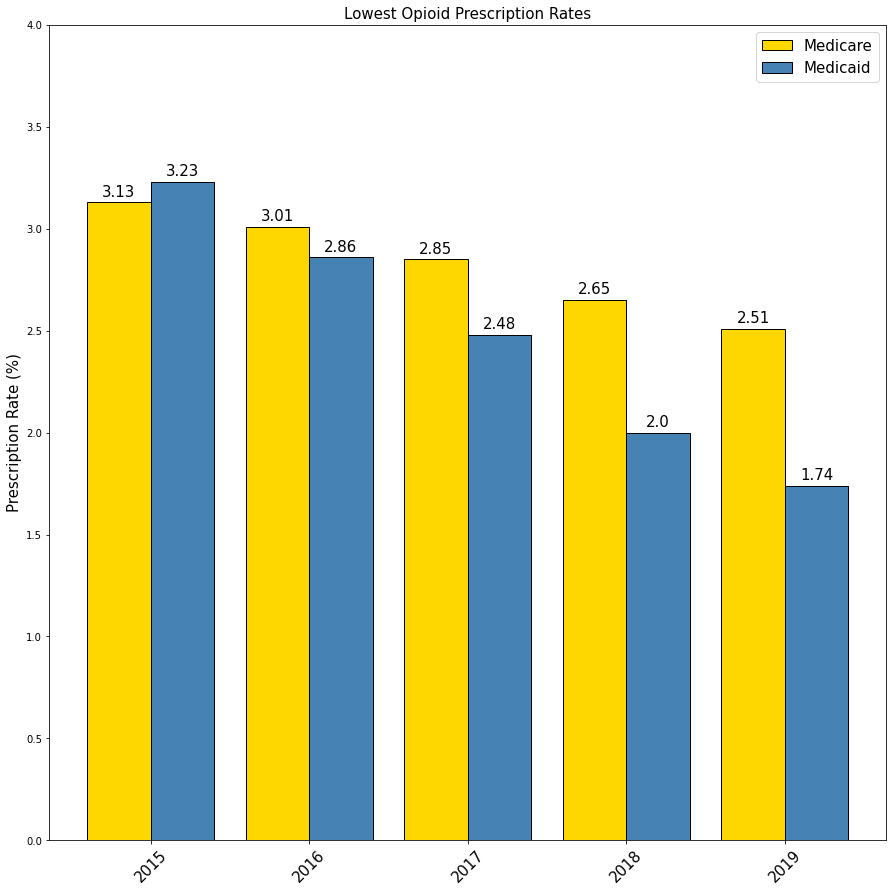

In [599]:
# set axis values
years = [2015, 2016, 2017, 2018, 2019]
y_care = care_botpr2["Opioid Prescribing Rate: Medicare"]
y_caid = caid_botpr2["Opioid Prescribing Rate: Medicaid"]

#set x-tick location
x = np.arange(len(years))
width = 0.4

fig, ax = plt.subplots(figsize = (15,15))

ax.set_ylabel("Prescription Rate (%)", size=15)
ax.set_title("Lowest Opioid Prescription Rates", size=15)
ax.set_xticks(x)
ax.set_xticklabels(years, size=15)
plt.xticks(rotation='45')
plt.ylim(0, 4)

# create the bar plot for medicaid LOPR
lopr_care = ax.bar(x-0.2, y_care, width, label="pr", facecolor="gold", edgecolor="black")
lopr_caid = ax.bar(x+0.2, y_caid, width, label="pr", facecolor="steelblue", edgecolor="black")

#add data labels at end of bars
for p in lopr_care:
    height = p.get_height()
    ax.annotate('{}'.format(height),
        xy=(p.get_x() + p.get_width() / 2, height),
        xytext=(0, 3),
        textcoords="offset points",
        ha='center', va='bottom',
        size=15)

for p in lopr_caid:
    height = p.get_height()
    ax.annotate('{}'.format(height),
        xy=(p.get_x() + p.get_width() / 2, height),
        xytext=(0, 3),
        textcoords="offset points",
        ha='center', va='bottom',
        size=15)

plt.legend(["Medicare", "Medicaid"], prop={"size":15})

#save graph as png
plt.savefig("Graphs/Lowest_PR_Both.png")

plt.show()

# national data
## create "National" dataframe and cleanup

In [384]:
# create list with "National" in it, then use it to drop all non-"National" states
drop = ["National"]
carecaid_national = carecaid.loc[carecaid["State"].isin(drop)==True]

#show df
carecaid_national

,Year,Prscrbr_Geo_Lvl,Prscrbr_Geo_Cd,State,RUCA_Cd,Breakout_Type,Breakout,Tot_Prscrbrs,Tot_Opioid_Prscrbrs,Tot_Opioid_Clms_x,...,Plan_Type,Tot_Opioid_Clms_y,Tot_Clms_y,Opioid_Prscrbng_Rate_y,Opioid_Prscrbng_Rate_5Y_Chg_y,Opioid_Prscrbng_Rate_1Y_Chg_y,LA_Tot_Opioid_Clms_y,LA_Opioid_Prscrbng_Rate_y,LA_Opioid_Prscrbng_Rate_5Y_Chg_y,LA_Opioid_Prscrbng_Rate_1Y_Chg_y
0,2019,National,NaN,National,NaN,Totals,Overall,1239380.0,803549.0,66138200.0,...,All,21978286.0,677248025.0,3.25,-3.22,-0.44,3108845.0,14.15,6.67,4.62
52,2018,National,NaN,National,NaN,Totals,Overall,1203507.0,812854.0,70194680.0,...,All,25238309.0,684306379.0,3.69,NaN,-0.89,2404585.0,9.53,NaN,2.03
104,2017,National,NaN,National,NaN,Totals,Overall,1161579.0,819443.0,75529409.0,...,All,32143076.0,702035786.0,4.58,NaN,-0.80,2411118.0,7.50,NaN,-0.04
156,2016,National,NaN,National,NaN,Totals,Overall,1130234.0,817051.0,78809664.0,...,All,36902273.0,685821751.0,5.38,NaN,-0.53,2783521.0,7.54,NaN,-0.06
208,2015,National,NaN,National,NaN,Totals,Overall,1100926.0,812390.0,79507020.0,...,All,37964067.0,641988059.0,5.91,NaN,-0.56,2885869.0,7.60,NaN,0.12


In [385]:
#drop all unwanted columns
carecaid_national = carecaid_national.drop(columns=["Prscrbr_Geo_Lvl", "Prscrbr_Geo_Cd","Prscrbr_Geo_Cd","RUCA_Cd","Breakout_Type","Breakout","Plan_Type",
                                                    "Geo_Cd", "LA_Tot_Opioid_Clms_x", "LA_Opioid_Prscrbng_Rate_x", "LA_Opioid_Prscrbng_Rate_5Y_Chg_x",
                                                    "LA_Opioid_Prscrbng_Rate_1Y_Chg_x","Geo_Lvl","LA_Tot_Opioid_Clms_y","LA_Opioid_Prscrbng_Rate_y",
                                                    "LA_Opioid_Prscrbng_Rate_5Y_Chg_y", "LA_Opioid_Prscrbng_Rate_1Y_Chg_y"], axis=1)

#rename columns for clarity - adding "Medicare" and "Medicaid" to appropriate columns
carecaid_national = carecaid_national.rename(columns={"Tot_Prscrbrs": "Total Prescribers",
                                                      "Tot_Opioid_Prscrbrs": "Total Opioid Prescribers",
                                                      "Tot_Opioid_Clms_x":"Total Opioid Claims: Medicare",
                                                      "Tot_Clms_x": "Total Claims: Medicare",
                                                      "Opioid_Prscrbng_Rate_x": "Opioid Prescribing Rate: Medicare",
                                                      "Opioid_Prscrbng_Rate_5Y_Chg_x": "Opioid Prescribing Rate, 5 Year Change: Medicare",
                                                      "Opioid_Prscrbng_Rate_1Y_Chg_x": "Opioid Prescribing Rate, 1 Year Change: Medicare",
                                                      "Tot_Opioid_Clms_y":"Total Opioid Claims: Medicaid",
                                                      "Tot_Clms_y": "Total Claims: Medicaid",
                                                      "Opioid_Prscrbng_Rate_y": "Opioid Prescribing Rate: Medicaid",
                                                      "Opioid_Prscrbng_Rate_5Y_Chg_y": "Opioid Prescribing Rate, 5 Year Change: Medicaid",
                                                      "Opioid_Prscrbng_Rate_1Y_Chg_y": "Opioid Prescribing Rate, 1 Year Change: Medicaid"})
#show cleaned df
carecaid_national

,Year,State,Total Prescribers,Total Opioid Prescribers,Total Opioid Claims: Medicare,Total Claims: Medicare,Opioid Prescribing Rate: Medicare,"Opioid Prescribing Rate, 5 Year Change: Medicare","Opioid Prescribing Rate, 1 Year Change: Medicare",Total Opioid Claims: Medicaid,Total Claims: Medicaid,Opioid Prescribing Rate: Medicaid,"Opioid Prescribing Rate, 5 Year Change: Medicaid","Opioid Prescribing Rate, 1 Year Change: Medicaid"
0,2019,National,1239380.0,803549.0,66138200.0,1.501140e+09,4.41,-1.32,-0.27,21978286.0,677248025.0,3.25,-3.22,-0.44
52,2018,National,1203507.0,812854.0,70194680.0,1.498449e+09,4.68,-1.14,-0.38,25238309.0,684306379.0,3.69,NaN,-0.89
104,2017,National,1161579.0,819443.0,75529409.0,1.493334e+09,5.06,NaN,-0.26,32143076.0,702035786.0,4.58,NaN,-0.80
156,2016,National,1130234.0,817051.0,78809664.0,1.479997e+09,5.32,NaN,-0.18,36902273.0,685821751.0,5.38,NaN,-0.53
208,2015,National,1100926.0,812390.0,79507020.0,1.446105e+09,5.50,NaN,-0.23,37964067.0,641988059.0,5.91,NaN,-0.56


## condensed national medicare and medicaid OPR dataframe

In [390]:
#create condensed df, sort by year ascending, set index to year
carecaid_nationalpr = carecaid_national[["Year", "Opioid Prescribing Rate: Medicare", "Opioid Prescribing Rate: Medicaid"]].sort_values("Year").set_index("Year")

#show df
carecaid_nationalpr

,Opioid Prescribing Rate: Medicare,Opioid Prescribing Rate: Medicaid
Year,,
2015,5.50,5.91
2016,5.32,5.38
2017,5.06,4.58
2018,4.68,3.69
2019,4.41,3.25


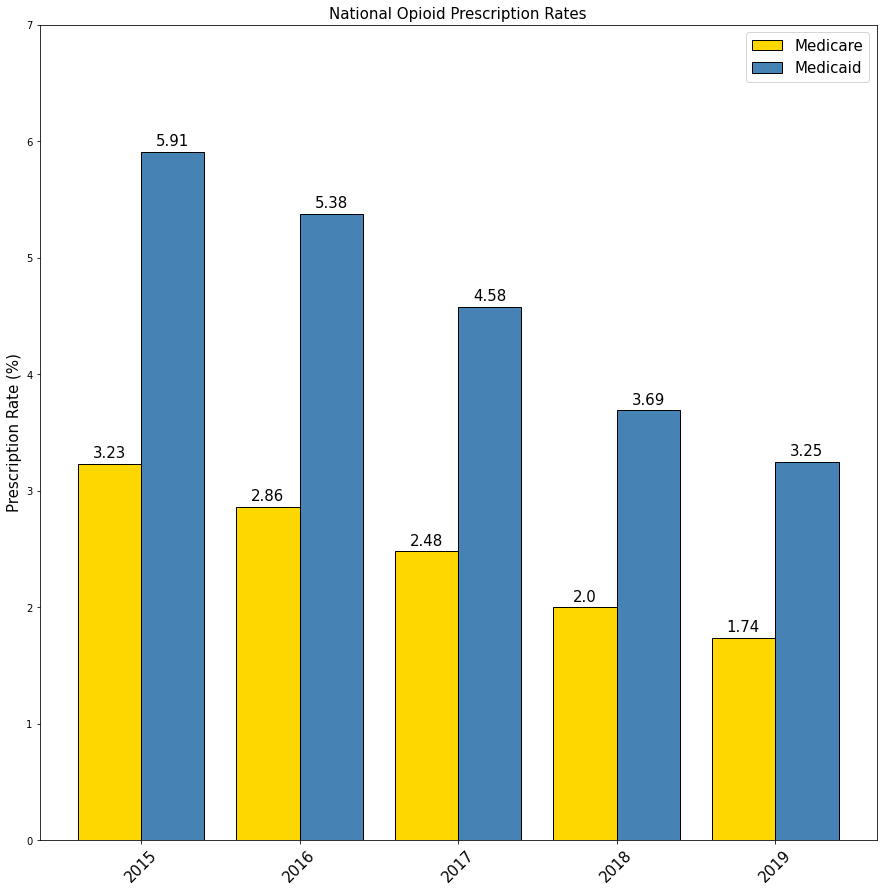

In [600]:
# set axis values
yrst = carecaid_nationalpr.index
pr1 = carecaid_nationalpr["Opioid Prescribing Rate: Medicare"]
pr2 = carecaid_nationalpr["Opioid Prescribing Rate: Medicaid"]

#set x-tick location
x = np.arange(len(yrst))
width = 0.4

fig, ax = plt.subplots(figsize = (15,15))

ax.set_ylabel("Prescription Rate (%)", size = 15)
ax.set_title("National Opioid Prescription Rates", size = 15)
ax.set_xticks(x)
ax.set_xticklabels(yrst, size = 15)
plt.xticks(rotation='45')
plt.ylim(0, 7)

# create the bar plot for national pr
care_natpr = ax.bar(x-0.2, pr, width, label="pr", facecolor="gold", edgecolor="black")
caid_natpr = ax.bar(x+0.2, pr2, width, label="pr2", facecolor="steelblue", edgecolor="black")

#add data labels at end of bars
for p in care_natpr:
    height = p.get_height()
    ax.annotate('{}'.format(height),
        xy=(p.get_x() + p.get_width() / 2, height),
        xytext=(0, 3),
        textcoords="offset points",
        ha='center', va='bottom',
        size = 15)

for p in caid_natpr:
    height = p.get_height()
    ax.annotate('{}'.format(height),
        xy=(p.get_x() + p.get_width() / 2, height),
        xytext=(0, 3),
        textcoords="offset points",
        ha='center', va='bottom',
        size = 15)

plt.legend(["Medicare", "Medicaid"], prop = {"size": 15})

#save graph as png
plt.savefig("Graphs/National_PR_Both.png")

plt.show()

# Colorado Medicaid Opioid Prescription Rate of Change
## Colorado was 2015-2017 highest Medicaid PR, Virginia was 2019 highest

In [473]:
colorado = carecaid_clean.loc[carecaid_clean["State"]=="Colorado"].sort_values("Year").set_index("Year")
virginia = carecaid_clean.loc[carecaid_clean["State"]=="Virginia"].sort_values("Year").set_index("Year")
virginia

,State,Total Prescribers,Total Opioid Prescribers,Total Opioid Claims: Medicare,Total Claims: Medicare,Opioid Prescribing Rate: Medicare,"Opioid Prescribing Rate, 5 Year Change: Medicare","Opioid Prescribing Rate, 1 Year Change: Medicare",Total Opioid Claims: Medicaid,Total Claims: Medicaid,Opioid Prescribing Rate: Medicaid,"Opioid Prescribing Rate, 5 Year Change: Medicaid","Opioid Prescribing Rate, 1 Year Change: Medicaid"
Year,,,,,,,,,,,,,
2015,Virginia,25319.0,19755.0,1720058.0,30555257.0,5.63,NaN,-0.29,583116.0,10186332.0,5.72,NaN,-0.62
2016,Virginia,25791.0,19812.0,1688431.0,31443443.0,5.37,NaN,-0.26,585718.0,10476636.0,5.59,NaN,-0.13
2017,Virginia,26554.0,19744.0,1536652.0,31548238.0,4.87,NaN,-0.50,432561.0,10350736.0,4.18,NaN,-1.41
2018,Virginia,27466.0,19641.0,1388036.0,31488501.0,4.41,-1.63,-0.46,726937.0,11094725.0,6.55,NaN,2.37
2019,Virginia,28336.0,19591.0,1314742.0,31176498.0,4.22,-1.70,-0.19,1752577.0,16919491.0,10.36,4.02,3.81


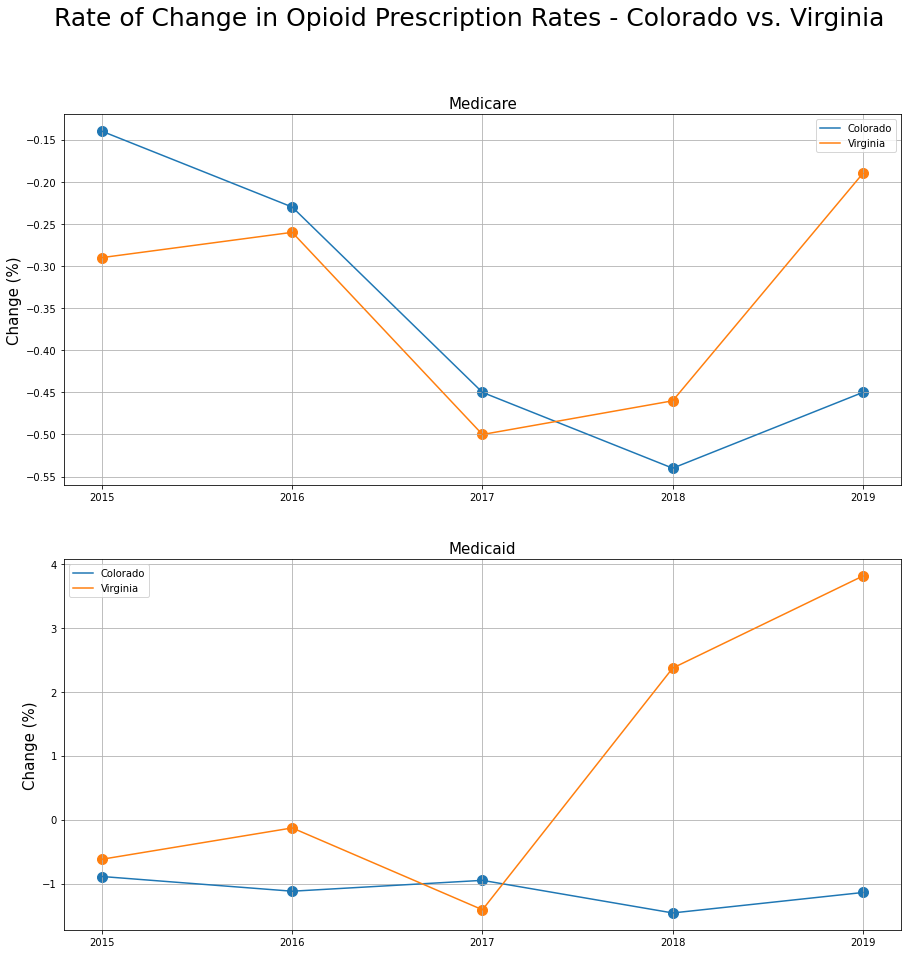

In [680]:
# create fig and subplot function so multiple graphs can be plotted together
fig, ax = plt.subplots(2, figsize=(15,15))

# create x and y variables 
x = [2015, 2016, 2017, 2018, 2019]
co_y1 = colorado["Opioid Prescribing Rate, 1 Year Change: Medicare"]
va_y1 = virginia["Opioid Prescribing Rate, 1 Year Change: Medicare"]
co_y2 = colorado["Opioid Prescribing Rate, 1 Year Change: Medicaid"]
va_y2 = virginia["Opioid Prescribing Rate, 1 Year Change: Medicaid"]

# create variable for scatter plot point size
s = 100

# Medicare scatter plot
ax[0].scatter(x, y = co_y1, s=s)        # Colorado scatter plot
ax[0].scatter(x, y = va_y1, s=s)        # Virginia scatter plot
ax[0].set_title("Medicare", size = 15)  # graph title
ax[0].set_ylabel("", size = 15)         # graph y-axis label
ax[0].plot(x, y1)                       # Colorado connecting line 
ax[0].plot(x, y2)                       # Virginia connecting line
ax[0].legend(["Colorado", "Virginia"],  # graph legend
             prop = {"size": 10})

# Medicaid scatter plot
ax[1].scatter(x, y = co_y2, s=s)   # Colorado scatter plot
ax[1].scatter(x, y = va_y2, s=s)   # Virginia scatter plot
ax[1].set_title("Medicaid", size = 15)  # graph title
ax[1].set_ylabel("", size = 15)         # graph y-axis label
ax[1].plot(x, co_y2)                    # Colorado connecting line
ax[1].plot(x, va_y2)                    # Virginia connecting line
ax[1].legend(["Colorado", "Virginia"],  # graph legend
             prop = {"size": 10})

# set figure y-axis label, xticks for both graphs, and add grids
for ax in ax.flat:
    ax.set(ylabel = "Change (%)")
    ax.set(xticks = x)
    ax.grid()          

# add title to figure
fig.suptitle("Rate of Change in Opioid Prescription Rates - Colorado vs. Virginia", size = 25)

# save figure to png
plt.savefig("Graphs/ROC_PR_COvsVA.png");